# Assignmnet-2
by K. Sai Somanath, 18MCMT28

## Question 1

Implement PCA and LDA

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler

In [61]:
def pca(data, components, e=False, std=True):
    if std:
        data_std = StandardScaler().fit_transform(data)
    else:
        data_std = data
    
    U, S, Vt = np.linalg.svd(data_std)
    print(U.shape, S.shape, Vt.shape)
    eigen_vectors = Vt.T
    eigen_values = S ** 2 / (data_std.shape[0] - 1)
    eigen_vectors = eigen_vectors[:, :components]
    eigen_values = eigen_values[:components]
    Y = np.dot(eigen_vectors.T, data_std.T)

    if e is True:
        return Y, eigen_values, eigen_vectors
    else:
        return Y.T

In [36]:
def lda(data, components):
    '''
    data: shape: classes x samples_size x no_features
    '''    
    # np.set_printoptions(precision=4)
    # Find the means
    means = np.mean(data, axis=1)
    # print(means)
    # Find the within class scatter matrix
    scatter_within = np.zeros((data.shape[-1], data.shape[-1]))
    for index, cls in enumerate(data):
        sc_mat = np.zeros((data.shape[-1], data.shape[-1]))
        for row in cls:
            r, m = row.reshape(data.shape[-1], 1), means[index].reshape(data.shape[-1], 1)
            sc_mat += (r-m).dot((r-m).T)
        scatter_within += sc_mat
        
    # print(scatter_within)
    
    # Find the between class matrix
    mu = np.mean(data.reshape(data.shape[0] * data.shape[1], data.shape[2]), axis=0).reshape(data.shape[-1], 1)
    # print(mu)
    scatter_between = np.zeros((data.shape[-1], data.shape[-1]))
    for m in means:
        m = m.reshape(data.shape[-1], 1)
        # print(m, mu, sep='\n\n')
        scatter_between += data.shape[1] * (m - mu).dot((m - mu).T)
    
    # print(scatter_between)
    
    eigen_values, eigen_vectors = np.linalg.eig(np.linalg.inv(scatter_within).dot(scatter_between))
    # print(eigen_values)
    
    # Make a list of (eigenvalue, eigenvector) tuples
    eigen_pairs = [(np.abs(eigen_values[i]), eigen_vectors[:,i]) for i in range(len(eigen_values))]
    # Sort the (eigenvalue, eigenvector) tuples from high to low
    eigen_pairs.sort(key=lambda k: k[0], reverse=True)
    # print(eigen_pairs)
#     matrix_w = np.hstack((eigen_pairs[0][1]))
#     for k in range(1, components):
    temp_t = tuple([eigen_pairs[x][1].reshape(data.shape[-1], 1) for x in range(components)])
    # print(matrix_w)
    matrix_w = np.hstack(temp_t)
    Y = data.reshape(data.shape[0] * data.shape[1], data.shape[2]).dot(matrix_w)
    return Y

## Question 2

Apply PCA and LDA on iris dataset

In [4]:
# Laod data
iris = np.genfromtxt('../iris.csv', delimiter=',', skip_header=1, usecols=(0,1,2,3))

(150, 150) (4,) (4, 4)


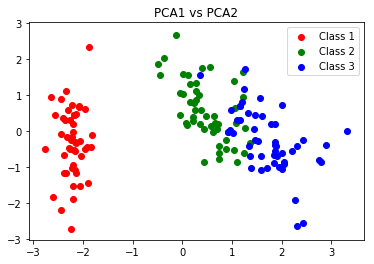

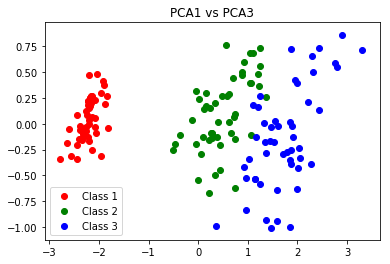

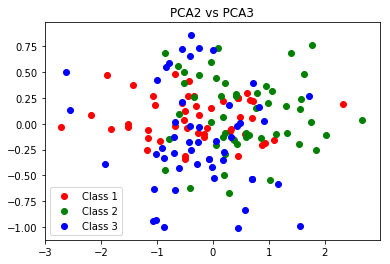

In [60]:
def pcaPlots():
    results = pca(iris, 3)
    plt.scatter(x=results[:50, 0], y=results[:50, 1], c='r', label='Class 1')
    plt.scatter(x=results[50:100, 0], y=results[50:100, 1], c='g', label='Class 2')
    plt.scatter(x=results[100:, 0], y=results[100:, 1], c='b', label='Class 3')
    plt.title('PCA1 vs PCA2')
    plt.legend()
    plt.show()
    plt.scatter(x=results[:50, 0], y=results[:50, 2], c='r', label='Class 1')
    plt.scatter(x=results[50:100, 0], y=results[50:100, 2], c='g', label='Class 2')
    plt.scatter(x=results[100:, 0], y=results[100:, 2], c='b', label='Class 3')
    plt.title('PCA1 vs PCA3')
    plt.legend()
    plt.show()
    plt.scatter(x=results[:50, 1], y=results[:50, 2], c='r', label='Class 1')
    plt.scatter(x=results[50:100, 1], y=results[50:100, 2], c='g', label='Class 2')
    plt.scatter(x=results[100:, 1], y=results[100:, 2], c='b' , label='Class 3')
    plt.title('PCA2 vs PCA3')
    plt.legend()
    plt.show()

pcaPlots()

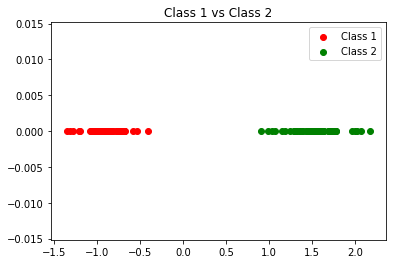

/Users/sai/.virtualenvs/Oculus/lib/python3.6/site-packages/numpy/core/numeric.py:591: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


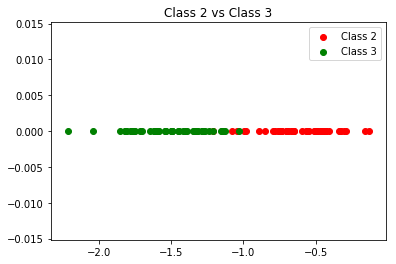

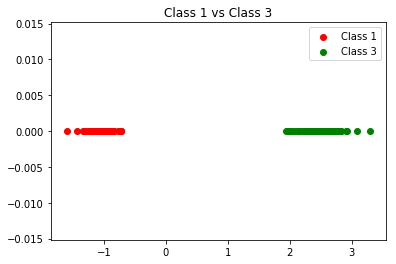

In [110]:
def ldaPlots():
    results = lda(iris[:100, :].reshape(2, 50, 4), 1)
    plt.scatter(x=results[:50], y=[0] * 50, c='r', label='Class 1')
    plt.scatter(x=results[50:], y=[0] * 50, c='g', label='Class 2')
    plt.title('Class 1 vs Class 2')
    plt.legend()
    plt.show()
    results = lda(iris[50:, :].reshape(2, 50, 4), 1)
    plt.scatter(x=results[:50], y=[0] * 50, c='r', label='Class 2')
    plt.scatter(x=results[50:], y=[0] * 50, c='g', label='Class 3')
    plt.title('Class 2 vs Class 3')
    plt.legend()
    plt.show()
    results = lda(np.vstack((iris[:50, :], iris[100:, :])).reshape(2, 50, 4), 1)
    plt.scatter(x=results[:50], y=[0] * 50, c='r', label='Class 1')
    plt.scatter(x=results[50:], y=[0] * 50, c='g', label='Class 3')
    plt.title('Class 1 vs Class 3')
    plt.legend()
    plt.show()
    
ldaPlots()

### Similarites:
1. We notice that both PCA and LDA are not able to seperate the classes 2 and 3.
2. Both the methods are able to find the speration for classes 1 and 2, and 1 and 3.

### Differences:
1. The PCA finds the direction in which it can retain the maximum variance.
2. The LDA method find the direction in which we can get the best class seperation.
3. PCA is unsupervised learning, while LDA is supervised. It assumes that data comes form a Guassian distribution

## Question 3


In [11]:
# Get data
file_handle = open('Data/arcene_train.data')
train = np.array([list(map(int, file_handle.readline().strip().split(' '))) for _ in range(100)], dtype=np.float64)

file_handle = open('Data/arcene_train.labels')
y_train = np.array([int(file_handle.readline().strip()) for _ in range(100)])

Text(0,0.5,'Eigenvalue')

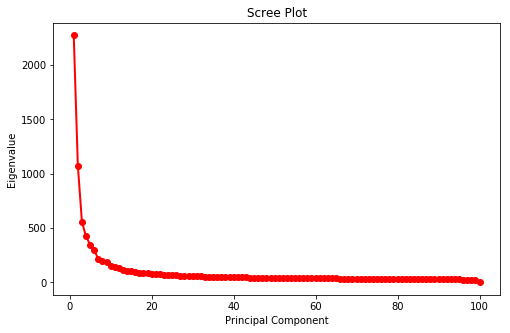

In [12]:
# Get the Scree Plot
Y, eigen_values, eigen_vectors = pca(train, 10000, e=True)
fig = plt.figure(figsize=(8,5))
sing_vals = np.arange(100) + 1
plt.plot(sing_vals, eigen_values, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')

In [19]:
variances = np.cumsum(eigen_values) / eigen_values.sum()
print("The number of components to choose:")
print('0.85:', np.where(variances >= 0.85)[0][0])
print('0.90:', np.where(variances >= 0.90)[0][0])
print('0.95:', np.where(variances >= 0.95)[0][0])
print('0.99:', np.where(variances >= 0.99)[0][0])

The number of components to choose:
0.85: 53
0.90: 66
0.95: 81
0.99: 95


(100, 100) (100,) (10000, 10000)


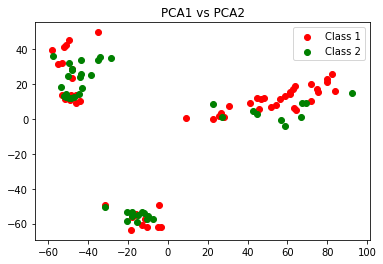

In [68]:
one = train[y_train == -1]
two = train[y_train == 1]
X = np.vstack((one, two))
results = pca(X, 2)

plt.scatter(x=results[:56, 0], y=results[:56, 1], c='r', label='Class 1')
plt.scatter(x=results[56:, 0], y=results[56:, 1], c='g', label='Class 2')
plt.title('PCA1 vs PCA2')
plt.legend()
plt.show()

### Comments:
The number of componets to choose for the specified veriance is given below:

0.85: 53 components

0.90: 66 components

0.95: 81 components

0.99: 95 components

We can notic that we just need 95 features to retain the 99% varicance.

1. The projection in first two components gives us no real seperation. 
2. The data is tightly coupled.
3. We clearly need more number of components to get a better seperation.
4. The variance that is retained for the first two components is really low.

Note in LDA: The scatter within matrix is a singular matix and therefore, we cannot find the inverse of it. Which in turns results in the inability to find the eigen values and vectors.

## Question 4

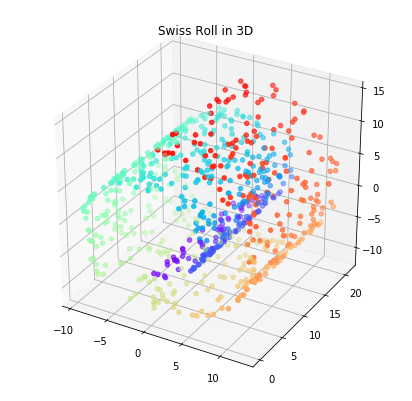

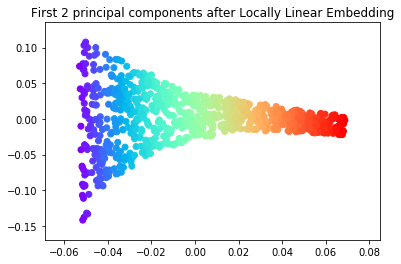

In [105]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets.samples_generator import make_swiss_roll
from sklearn.manifold import locally_linear_embedding

X, color = make_swiss_roll(n_samples=800, random_state=123)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.rainbow)
plt.title('Swiss Roll in 3D')
plt.show()

X_lle, err = locally_linear_embedding(X, n_neighbors=12, n_components=2)

plt.scatter(X_lle[:, 0], X_lle[:, 1], c=color, cmap=plt.cm.rainbow)

plt.title('First 2 principal components after Locally Linear Embedding')
plt.show()

(800, 3)
(800, 2)


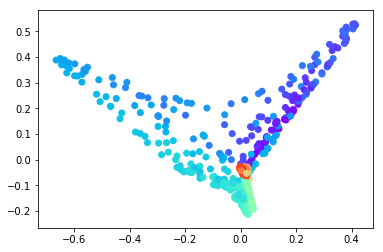

In [106]:
from sklearn.decomposition import KernelPCA, PCA
kpca = KernelPCA(kernel="rbf",gamma=0.1 ,n_components=2)
print(X.shape)
X_kpca = kpca.fit_transform(X)
print(X_kpca.shape)
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=color, cmap=plt.cm.rainbow)

(800, 800) (3,) (3, 3)


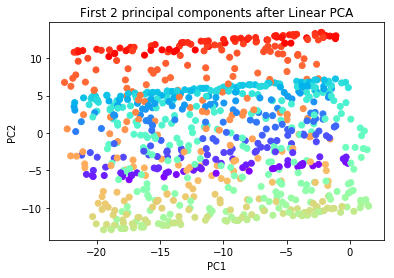

In [109]:
X_pca = pca(X, 2, std=False)
plt.scatter(X_pca[:,0], X_pca[:,1], c=color, cmap=plt.cm.rainbow)
plt.title('First 2 principal components after Linear PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

### Coments:

#### LLE:

1. LLE method is able to find a good spereation between the data.
2. We can see that it is successful in unrolling the swiss roll.
3. This method gies the best result of all the three.

#### KPCA

1. KPCA with the rbf kernel is used.
2. A gamma of 0.1 gives the best results although it still is not able to seperate the classes well.
3. A lot of data points are still close to each other.

#### PCA

1. PCA performs the worst. 
2. A projection in the first two components is not able to unroll the data.
3. Most of the data points just overlap with each other.
4. It becomes a roll in the 2d space.